# 🏁 Módulo 4 – Preguntas de Negocio

**Objetivo del módulo**  
Aplicar todo lo aprendido (limpieza, EDA, visualización, agrupaciones) para **responder preguntas de negocio reales** con Python y Pandas.

**¿Por qué es importante?**  
Un analista de datos no solo organiza tablas: transforma datos en **insights accionables** que guían decisiones de producto, marketing o estrategia. Saber plantear y contestar preguntas concretas demuestra el valor práctico de tus habilidades técnicas.

---

En este notebook resolverás **20 preguntas** usando el dataset limpio `salarios_pais.csv`.  
Cada pregunta viene acompañada de una celda *Markdown* (enunciado) y su celda de código con la solución.



---
## 0 · Setup
Cargamos librerías y configuramos Seaborn para que los gráficos se vean con un estilo agradable.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from cursos.analisis_datos.utils.paths import DATA_PROCESSED_DIR
path_salarios_pais = DATA_PROCESSED_DIR / "salarios_pais.csv"
path_salarios_pais = str(path_salarios_pais)
print(f"Ruta del archivo salarios_pais: {path_salarios_pais}")
print(f"existe archivo salarios_pais: {Path(path_salarios_pais).exists()}")
df_salarios_pais = pd.read_csv(filepath_or_buffer=path_salarios_pais, sep=',', encoding='utf-8')
df_salarios_pais.head()

ModuleNotFoundError: No module named 'cursos'

In [2]:
# ─────────────────────────────────────────────
# 🔁 Carga de datos desde ruta relativa estructurada
# ─────────────────────────────────────────────

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# 1. Subimos al root del proyecto (estás en cursos/analisis_datos/notebooks)
root_path = Path.cwd().resolve().parents[2]   # Subir dos niveles: notebooks → analisis_datos → cursos
if str(root_path) not in sys.path:
    sys.path.append(str(root_path))

# 2. Importamos la ruta del dataset desde paths.py
from cursos.analisis_datos.utils.paths import DATA_PROCESSED_DIR

# 3. Armamos la ruta final del archivo
path_salarios_pais = DATA_PROCESSED_DIR / "df_salarios_pais.csv"

# 4. Verificamos existencia y lo leemos
print(f"Ruta completa: {path_salarios_pais}")
print(f"¿Existe archivo? {path_salarios_pais.exists()}")

df_salarios_pais = pd.read_csv(path_salarios_pais, encoding='utf-8')
df_salarios_pais.head()

Ruta completa: C:\Users\genti\OneDrive\Documentos\Práctica_curso_07-2025_análisis de datos\pydatapanama-cursos\cursos\analisis_datos\data\processed\df_salarios_pais.csv
¿Existe archivo? True


,nombre,apellido,edad,pais,educacion_universitaria,nombre_de_la_empresa,cargo,anos_en_la_empresa,sueldo_usd,bono_eur,bono_anual_dolares,capital,cantidad_de_habitantes,PIB,ingreso_per_capita,compensacion_total,senioridad
0,José,López,36,Chile,Sí,Mercado Libre,Python Developer,2,71841.0,4981.0,5479.1,Santiago,19116209.0,3.170000e+11,16580.0,77320.1,Junior
1,Fernanda,Vargas,39,Chile,Sí,Amazon,AI Software Engineer,2,142115.0,1252.0,1377.2,Santiago,19116209.0,3.170000e+11,16580.0,143492.2,Junior
2,Fernanda,Ramírez,30,Colombia,No,Facebook,Machine Learning Engineer,2,92278.0,5262.0,5788.2,Bogotá,51874024.0,3.430000e+11,6611.0,98066.2,Junior
3,José,Gómez,35,Chile,Sí,Mercado Libre,Python Developer,12,97130.0,3671.0,4038.1,Santiago,19116209.0,3.170000e+11,16580.0,101168.1,Senior
4,Ana,Pérez,32,Panamá,No,Amazon,Project Manager,2,61413.0,10190.0,11209.0,Ciudad de Panamá,4468000.0,7.600000e+10,16995.0,72622.0,Junior


## 1️⃣ Pregunta  
**¿Cuál es la compensación total promedio en el dataset?**

### ¿Por qué importa?  
La media salarial brinda una referencia rápida para entender el nivel general de pago en la organización o sector. Permite comparar con benchmarks externos y detectar si la empresa está ofreciendo compensaciones competitivas.

### Pista  
La respuesta está a un solo método de distancia sobre la columna `compensacion_total`.

In [3]:
# Confirmamos tipo de dato
print(f"Tipo de dato: {df_salarios_pais['compensacion_total'].dtype}")

Tipo de dato: float64


In [5]:
# Calcula la compensación total promedio
media_compensacion = df_salarios_pais['compensacion_total'].mean()
print(f"💰 La compensación total promedio es: ${media_compensacion:,.2f}")

💰 La compensación total promedio es: $94,583.37


## 2️⃣ Pregunta  
**¿Quiénes son los 5 empleados con la compensación total más alta?**

### ¿Por qué importa?  
Identificar a los empleados mejor pagados ayuda a:  
- Detectar roles o perfiles críticos con alto valor de mercado.  
- Verificar consistencia salarial interna y posibles brechas injustificadas.  
- Analizar si los niveles de compensación se alinean con la estrategia de retención de talento.

### Pista   
Ordena la columna `compensacion_total` de forma descendente y toma solo las primeras 5 filas.

In [6]:
# Top 5 empleados con mayor compensación total
top_5_compensacion = df_salarios_pais.sort_values(by="compensacion_total", ascending=False).head(5)

# Mostrar columnas clave
top_5_compensacion[["nombre", "apellido", "cargo", "compensacion_total", "pais", "senioridad"]]


,nombre,apellido,cargo,compensacion_total,pais,senioridad
94,Luis,Rodríguez,AI Software Engineer,167806.7,Colombia,Senior
162,Ana,Morales,AI Software Engineer,165880.7,México,Senior
7,Pedro,Herrera,AI Software Engineer,164982.1,México,Junior
143,Luis,Herrera,AI Software Engineer,163275.9,Costa Rica,Senior
86,Lucía,Flores,AI Software Engineer,162450.4,Argentina,Junior


🧾 Explicación profesional:
sort_values(...): organiza el DataFrame según una columna.

-ascending=False: indica que queremos los valores de mayor a menor.

-.head(5): toma solo los 5 primeros.

-Luego seleccionamos columnas clave para mostrar solo la información relevante.

## 3️⃣ Pregunta  
**¿Qué país registra la compensación total promedio más alta?**

### ¿Por qué importa?  
Conocer el país donde los salarios son más altos permite:  
- Evaluar mercados laborales competitivos y su impacto en costes de contratación.  
- Diseñar políticas de compensación diferenciadas por región.  
- Detectar posibles desalineamientos con el costo de vida o la estrategia global de la empresa.

### Pista  
Agrupa por `pais`, calcula el promedio de `compensacion_total` y ordena de mayor a menor.

In [7]:
# País con la compensación promedio más alta
# Calcular la compensación total promedio por país
compensacion_por_pais = (
    df_salarios_pais
    .groupby("pais")["compensacion_total"]
    .mean()
    .sort_values(ascending=False)
)

# Mostrar resultados
print(compensacion_por_pais)

pais
Colombia      98578.348837
Chile         98009.616216
Uruguay       96447.094737
Argentina     93348.609756
Perú          93303.702941
Panamá        92684.865625
Costa Rica    92614.717949
México        91380.732558
Name: compensacion_total, dtype: float64


🧾 Explicación paso a paso:

-groupby("pais"): agrupar los datos por país.

-["compensacion_total"]: seleccionar la columna sobre la que queremos hacer el análisis.

-.mean(): calcular el promedio por grupo (país).

-.sort_values(ascending=False): ordenar de mayor a menor, para saber qué país tiene la media más alta.



## 4️⃣ Pregunta  
**¿Cómo se distribuye la compensación total según el nivel de senioridad?**  
*(Visualiza la comparación con un boxplot).*

### ¿Por qué importa?  
- Revela si existen diferencias salariales significativas entre Juniors y Seniors.  
- Permite detectar outliers (pagos extremadamente altos o bajos) por nivel.  
- Ayuda a planificar escalas de compensación equitativas y competitivas.

### Pista  
Usa `sns.boxplot()` con `x='senioridad'` y `y='compensacion_total'`.

C:\Users\genti\AppData\Local\Temp\ipykernel_61436\3059125157.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='senioridad', y='compensacion_total', data=df_salarios_pais, palette='Set2')


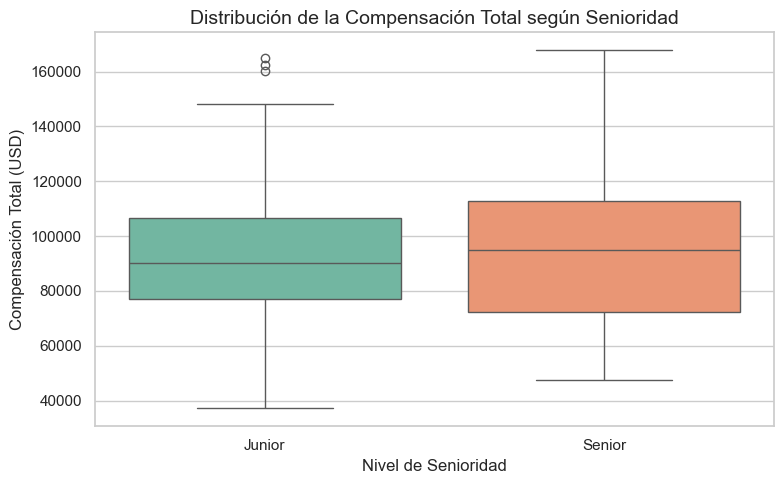

In [8]:
# Boxplot de compensación total por nivel de senioridad
# Estilo de Seaborn para gráficos más limpios
sns.set(style="whitegrid")

# Crear boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='senioridad', y='compensacion_total', data=df_salarios_pais, palette='Set2')

# Etiquetas y título
plt.title("Distribución de la Compensación Total según Senioridad", fontsize=14)
plt.xlabel("Nivel de Senioridad", fontsize=12)
plt.ylabel("Compensación Total (USD)", fontsize=12)
plt.tight_layout()
plt.show()

Análisis del Gráfico: 

Aunque los empleados Senior presentan en promedio una mayor compensación total, se identifican múltiples outliers en el grupo Junior que podrían corresponder a excepciones como bonos elevados, errores de categorización o condiciones particulares de mercado. Se recomienda revisar esos casos individualmente para verificar la coherencia de la información.

#### 🧾 Explicación rápida del Código

-x='senioridad': categoriza por Junior/Senior.

-y='compensacion_total': muestra la variable numérica a analizar.

-sns.boxplot(...): traza la mediana, cuartiles y valores extremos (outliers).

-palette='Set2': da colores suaves y agradables.

-plt.tight_layout(): mejora el ajuste del gráfico en notebooks.


## 5️⃣ Pregunta  
**¿Existe correlación entre los años en la empresa y la compensación total?**

### ¿Por qué importa?  
- Permite evaluar si la antigüedad impacta directamente en el salario.  
- Ayuda a validar políticas de incremento por permanencia.  
- Detectar una baja correlación podría indicar que la compensación está más ligada a desempeño o rol que a tiempo en la organización.

### Pista  
Calcula el coeficiente de correlación de Pearson entre `anos_en_la_empresa` y `compensacion_total`.

In [9]:
df_salarios_pais.columns

Index(['nombre', 'apellido', 'edad', 'pais', 'educacion_universitaria',
       'nombre_de_la_empresa', 'cargo', 'anos_en_la_empresa', 'sueldo_usd',
       'bono_eur', 'bono_anual_dolares', 'capital', 'cantidad_de_habitantes',
       'PIB', 'ingreso_per_capita', 'compensacion_total', 'senioridad'],
      dtype='object')

In [10]:
## Renombrar la columna 'anos_en_la_empresa' a 'años_en_la_empresa'
df_salarios_pais.rename(columns={"anos_en_la_empresa": "años_en_la_empresa"}, inplace=True)

In [11]:
# Mostrar las columnas del Dataframe
df_salarios_pais.columns

Index(['nombre', 'apellido', 'edad', 'pais', 'educacion_universitaria',
       'nombre_de_la_empresa', 'cargo', 'años_en_la_empresa', 'sueldo_usd',
       'bono_eur', 'bono_anual_dolares', 'capital', 'cantidad_de_habitantes',
       'PIB', 'ingreso_per_capita', 'compensacion_total', 'senioridad'],
      dtype='object')

In [12]:
# Correlación de Pearson entre antigüedad y compensación total
correlacion = df_salarios_pais['años_en_la_empresa'].corr(df_salarios_pais['compensacion_total'])

print(f"🔗 Correlación entre años en la empresa y compensación total: {correlacion:.2f}")


🔗 Correlación entre años en la empresa y compensación total: 0.02


🔍 **Conclusión:**  
La correlación entre los años en la empresa y la compensación total es de apenas **0.02**, lo que indica una relación prácticamente nula.  
Esto sugiere que el salario no está determinado por la antigüedad, sino probablemente por otros factores como el cargo, el país o el nivel educativo.  


Desglose:

-df_salarios_pais['años_en_la_empresa']: representa el número de años que una persona ha trabajado en su empresa.

-df_salarios_pais['compensacion_total']: representa la compensación total anual en USD.

-.corr(...): calcula el coeficiente de correlación entre ambas columnas; calcula la correlación de Pearson, que mide la fuerza y dirección de la relación lineal entre dos variables numéricas.

## 6️⃣ Pregunta  
**¿Qué cargo presenta la mediana de compensación total más alta?**

### ¿Por qué importa?  
- La mediana es robusta frente a outliers; refleja el salario “típico” para cada rol.  
- Ayuda a identificar posiciones clave con mayor valor de mercado o responsabilidad.  
- Informa decisiones de contratación y alineación salarial interna.

### Pista  
Agrupa por `cargo`, calcula la **mediana** de `compensacion_total`, ordena en orden descendente y observa el primer resultado.

In [13]:
# Cargo con la mediana de compensación total más alta

# Agrupar por 'cargo' y calcular la mediana de 'compensacion_total'
mediana_por_cargo = df_salarios_pais.groupby('cargo')['compensacion_total'].median()

# Ordenar de mayor a menor
mediana_ordenada = mediana_por_cargo.sort_values(ascending=False)

# Mostrar el cargo con la mediana más alta
cargo_top = mediana_ordenada.head(1)

print("Cargo con la mediana más alta:")
print(cargo_top)

Cargo con la mediana más alta:
cargo
AI Software Engineer    130957.7
Name: compensacion_total, dtype: float64


El rol de AI Software Engineer presenta la compensación total mediana más alta, con $130,957.70. Esto sugiere que, de forma general, este perfil es uno de los más valorados en el mercado laboral analizado. Puede estar relacionado con la alta demanda y especialización requerida en el campo de inteligencia artificial.

#### Explicación del Código
-groupby('cargo') → agrupa el DataFrame por cada tipo de cargo.

-['compensacion_total'].median() → calcula la mediana de compensación total para cada cargo.

-sort_values(ascending=False) → ordena de mayor a menor.

-head(1) → obtiene el cargo con la mediana más alta.

-Finalmente se imprime ese resultado.

## 7️⃣ Pregunta  
**¿Cómo es la distribución de los bonos anuales en dólares?**  
*(Construye un histograma e incluye la curva KDE para visualizar la densidad).*

### ¿Por qué importa?  
- Ayuda a ver si los bonos están concentrados en un rango específico o tienen una cola larga.  
- Detecta outliers que podrían distorsionar el promedio.  
- Facilita comparar políticas de incentivos entre departamentos o países.

### Pista  
Usa `sns.histplot()` sobre la columna `bono_anual_dolares`, pon `bins=30` y `kde=True`.

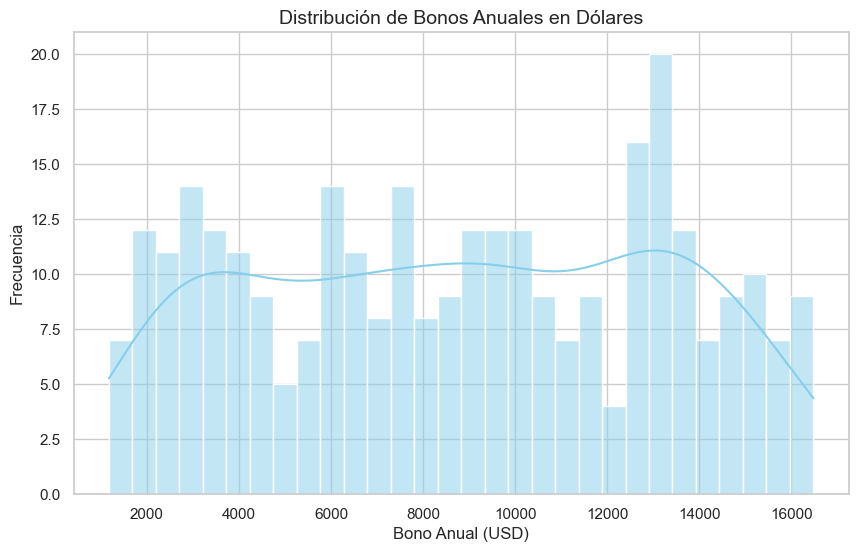

In [14]:
# Histograma y KDE de los bonos anuales en USD
# Tamaño del gráfico
plt.figure(figsize=(10, 6))

# Histograma con curva de densidad
sns.histplot(df_salarios_pais['bono_anual_dolares'], bins=30, kde=True, color='skyblue')

# Títulos y etiquetas
plt.title("Distribución de Bonos Anuales en Dólares", fontsize=14)
plt.xlabel("Bono Anual (USD)")
plt.ylabel("Frecuencia")
plt.grid(True)

# Mostrar
plt.show()


#### 📊 Distribución de Bonos Anuales en Dólares

La visualización muestra cómo se distribuyen los bonos anuales (bono_anual_dolares) entre los empleados del dataset:

El histograma refleja la frecuencia de bonos en diferentes rangos, divididos en 30 bins.

La línea azul (KDE) indica la densidad de la distribución, mostrando dónde se concentra la mayor parte de los valores.

### ***Observaciones Clave:***
La distribución no es perfectamente normal; muestra una ligera dispersión con varios picos, lo que sugiere que hay múltiples grupos de bonos frecuentes.

Se observan valores en todo el rango, desde bonos bajos (~1,000 USD) hasta bonos altos (~16,000 USD).

Hay una alta concentración de bonos entre 3,000 y 14,000 USD, con picos importantes alrededor de los 12,000 a 14,000 USD.

No se detectan outliers extremos visualmente, pero se puede hacer un análisis estadístico si se desea confirmar.

Esta dispersión podría deberse a diferencias por país, empresa o nivel de senioridad.


## 8️⃣ Pregunta  
**¿Qué proporción de empleados proviene de cada país?**  
*(Visualiza el resultado en un barplot).*

### ¿Por qué importa?  
- Mide la **representatividad geográfica** de la fuerza laboral.  
- Ayuda a detectar concentración en un país y oportunidades de diversificación.  
- Sirve como referencia para ajustar políticas de compensación y beneficio regional.

### Pista  
Calcula `value_counts(normalize=True)` sobre la columna `pais`, multiplícalo por 100 para obtener porcentajes y grafícalo con `plot(kind='bar')`.

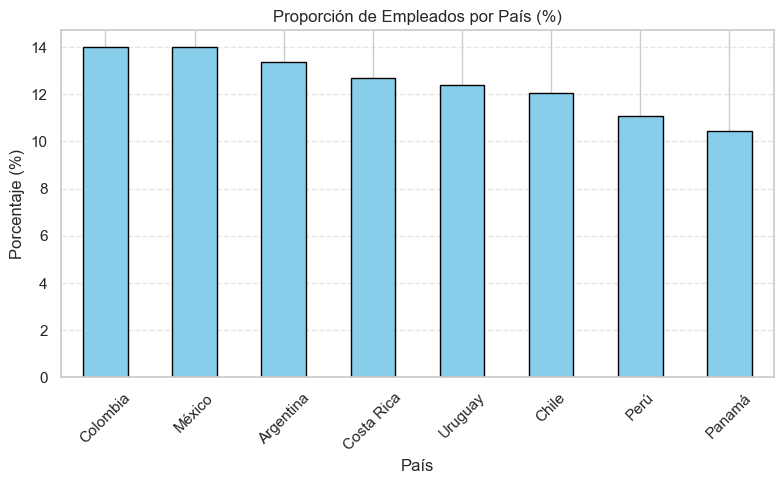

In [15]:
# Proporción de empleados por país (en %)
# Calcular proporciones por país en porcentaje
proporcion_paises = df_salarios_pais['pais'].value_counts(normalize=True) * 100

# Visualizar como gráfico de barras
plt.figure(figsize=(8, 5))
proporcion_paises.plot(kind='bar', color='skyblue', edgecolor='black')

# Títulos y etiquetas
plt.title('Proporción de Empleados por País (%)')
plt.xlabel('País')
plt.ylabel('Porcentaje (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Proporción de Empleados por País**

En este gráfico de barras se visualiza la proporción relativa de empleados provenientes de cada país en el dataset.

Colombia y México lideran con aproximadamente un 14% cada uno, seguidos por Argentina, Costa Rica, y Uruguay.

En contraste, Panamá y Perú tienen la menor representación, con un poco más del 10%.

##### *Este análisis permite:*

Medir la diversidad geográfica de la fuerza laboral.

Evaluar la necesidad de estrategias específicas de reclutamiento y compensación en regiones menos representadas.

Comprender la concentración de talento y posibles sesgos en procesos de contratación.

#### **Explicación del código**

-value_counts(normalize=True)

-Calcula la frecuencia relativa (proporciones) de cada país en la columna 'pais'.
 Al multiplicarlo por 100, obtenemos los porcentajes.

-plot(kind='bar')
 Genera un gráfico de barras para representar visualmente los porcentajes.

-plt.grid(axis='y', linestyle='--', alpha=0.5)
 Añade una cuadrícula horizontal para mejorar la lectura del gráfico.

-plt.xticks(rotation=45)
 Gira las etiquetas del eje X si hay muchos países o nombres largos, para que no se sobrepongan.

## 9️⃣ Pregunta  
**¿Cuál es el bono anual máximo registrado para cada cargo?**

### ¿Por qué importa?  
- Revela el techo de incentivos para cada rol.  
- Permite verificar si ciertos cargos reciben bonos excepcionalmente altos (posibles outliers o políticas de bonificación agresivas).  
- Ayuda a diseñar esquemas de reconocimiento competitivos y equitativos.

### Pista  
Agrupa por `cargo`, aplica `max()` a `bono_anual_dolares` y ordena el resultado de mayor a menor.

In [16]:
# Bono anual máximo por cargo (ordenado de mayor a menor)
bono_max_por_cargo = df_salarios_pais.groupby('cargo')['bono_anual_dolares'].max().sort_values(ascending=False)
print(bono_max_por_cargo)


cargo
Python Developer             16476.9
Data Engineer                16457.1
Data Scientist               16406.5
AI Software Engineer         16150.2
Project Manager              16079.8
Software Engineer            16039.1
Data Analyst                 15991.8
Product Owner                15796.0
Machine Learning Engineer    14022.8
Name: bono_anual_dolares, dtype: float64


#### Explicación del Código
*-df_salarios_pais.groupby('cargo')*
➤ Agrupa los datos según la columna "cargo".
Esto significa que todos los registros de un mismo cargo (por ejemplo: "Data Scientist", "Product Manager") se agrupan juntos para análisis.

*-['bono_anual_dolares']*
➤ Selecciona la columna específica sobre la que queremos operar: los bonos anuales.

*-.max()*
➤ Calcula el valor máximo del bono anual para cada grupo (cada tipo de cargo).

*-.sort_values(ascending=False)*
➤ Ordena los resultados de mayor a menor, para que veamos primero los cargos con los bonos más altos.

In [17]:
# Opcional pero funcional: convertir a DataFrame para visualización más ordenada
bono_max_df = bono_max_por_cargo.reset_index().rename(columns={'bono_anual_dolares': 'bono_maximo'})
bono_max_df.head(10)


,cargo,bono_maximo
0,Python Developer,16476.9
1,Data Engineer,16457.1
2,Data Scientist,16406.5
3,AI Software Engineer,16150.2
4,Project Manager,16079.8
5,Software Engineer,16039.1
6,Data Analyst,15991.8
7,Product Owner,15796.0
8,Machine Learning Engineer,14022.8


## 🔟 Pregunta  
**¿Cuáles son los 3 países con más empleados que ocupan el cargo de *Data Scientist*?**

### ¿Por qué importa?  
- Indica dónde se concentra el talento de ciencia de datos en la organización.  
- Ayuda a orientar iniciativas de reclutamiento, formación y comunidades locales.  
- Puede revelar hubs de innovación o brechas regionales en ese perfil tan demandado.

### Pista  
Filtra el DataFrame por `cargo == "Data Scientist"` y aplica `value_counts()` sobre la columna `pais`, luego utiliza `.head(3)`.

In [18]:
# Top 3 países con más Data Scientists
# Filtrar solo los empleados cuyo cargo es "Data Scientist"
data_scientists = df_salarios_pais[df_salarios_pais['cargo'] == "Data Scientist"]

# Contar cuántos hay por país y seleccionar los 3 con más empleados
top_3_paises_ds = data_scientists['pais'].value_counts().head(3)

# Mostrar resultado
print(top_3_paises_ds)


pais
Perú         7
Uruguay      6
Argentina    6
Name: count, dtype: int64


#### Explicación del código:

*-df_salarios_pais[df_salarios_pais['cargo'] == "Data Scientist"]*
➤ Filtra el DataFrame para quedarse solo con las filas donde el cargo es Data Scientist.

*-['pais'].value_counts()*
➤ Cuenta cuántas veces aparece cada país entre los empleados filtrados (solo Data Scientists).

*-.head(3)*
➤ Devuelve solo los 3 países con más empleados en ese cargo.

## 1️⃣1️⃣ Pregunta  
**¿Cómo se relacionan entre sí las variables numéricas del dataset?**  
*(Construye una matriz de correlación y preséntala en un heatmap).*

### ¿Por qué importa?  
- Detecta **relaciones lineales fuertes** (positivas o negativas) entre variables.  
- Ayuda a identificar **multicolinealidad** antes de crear modelos predictivos.  
- Destaca patrones inesperados que merecen análisis más profundo.

### Pista  
Selecciona solo las columnas numéricas (`select_dtypes('number')`), calcula `corr()` y grafica con `sns.heatmap(annot=True, cmap='coolwarm')`.

C:\Users\genti\AppData\Local\Temp\ipykernel_61436\1583053199.py:14: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\genti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


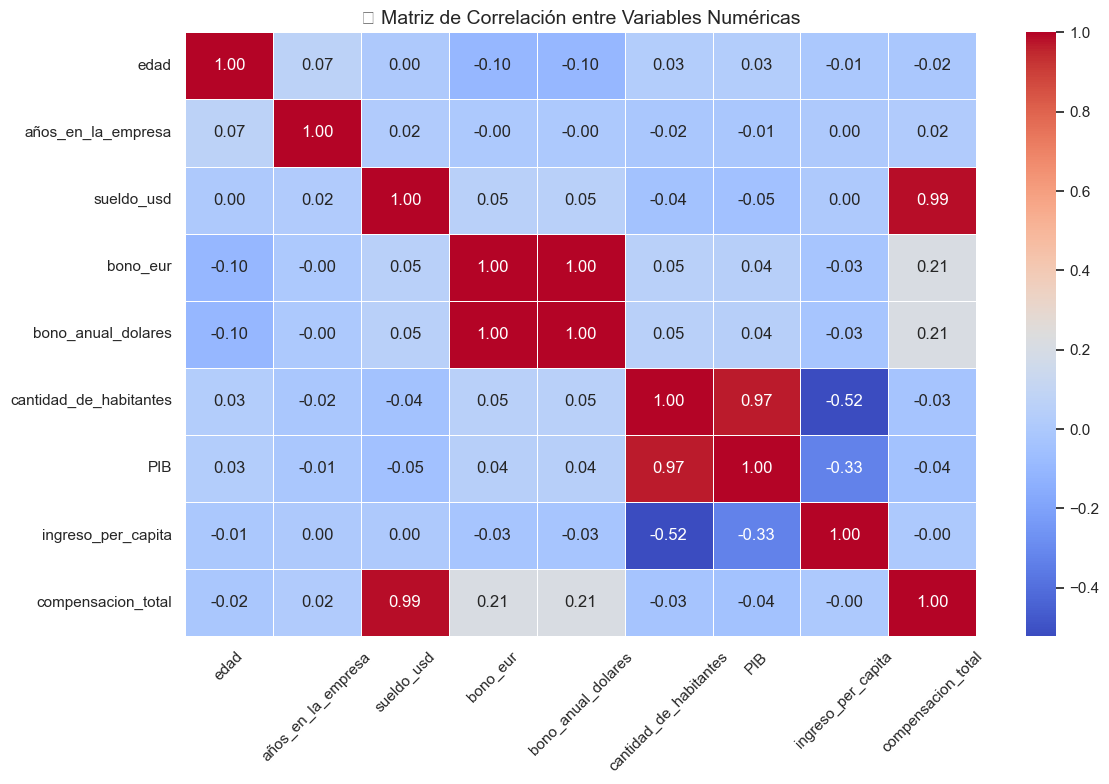

In [19]:
# Matriz de correlación numérica con heatmap
# 1. Seleccionamos solo las columnas numéricas
df_numericas = df_salarios_pais.select_dtypes(include='number')

# 2. Calculamos la matriz de correlación
matriz_correlacion = df_numericas.corr()

# 3. Visualizamos con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔗 Matriz de Correlación entre Variables Numéricas", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Explicación del Código

🔹 select_dtypes(include='number'): selecciona automáticamente todas las columnas numéricas del DataFrame para centrarnos en variables cuantitativas.

🔹 .corr(): calcula la correlación de Pearson entre cada par de variables. Esta mide qué tan linealmente relacionadas están dos variables, entre -1 (relación inversa perfecta) y 1 (relación directa perfecta).

🔹 sns.heatmap(..., annot=True, cmap='coolwarm'): crea un mapa de calor con los valores numéricos encima de cada celda y una paleta de colores que va de azul (correlación negativa) a rojo (correlación positiva).

🔹 figsize: aumenta el tamaño de la figura para mejor visualización.

### Interpretación del Heatmap
🔴 Alta correlación positiva (cerca de 1):

sueldo_usd y compensacion_total: 0.99, lo cual es esperable, ya que la compensación total probablemente incluye el sueldo como su componente principal.

cantidad_de_habitantes y PIB: 0.97, lo que tiene sentido ya que países con más población tienden a tener un mayor producto interno bruto total.

🔵 Correlación negativa (cerca de -0.5 o menos):

cantidad_de_habitantes con ingreso_per_capita: -0.52, lo que indica que en esta muestra, países más poblados tienden a tener ingresos per cápita más bajos (lo cual puede reflejar realidades socioeconómicas).

⚪ Correlación baja o casi nula (~0):

edad y compensacion_total: -0.02 → prácticamente sin relación.

años_en_la_empresa y compensacion_total: 0.02 → correlación débil, ya lo habíamos visto en la pregunta 5.

#### Conclusión Analítica

Las variables fuertemente correlacionadas indican potencial redundancia (por ejemplo, sueldo_usd y compensacion_total), lo cual es importante si planeamos entrenar un modelo de ML: podría causar multicolinealidad.

Las variables con baja correlación, como edad o años_en_la_empresa, no parecen tener una relación lineal fuerte con la compensación, por lo que habría que evaluar otras métricas o transformaciones si se quiera usar para predicción.



## 1️⃣2️⃣ Pregunta  
**¿Qué porcentaje de empleados del dataset tiene educación universitaria?**

### ¿Por qué importa?**  
- Mide el nivel de formación académica dentro de la organización.  
- Sirve de referencia para programas de capacitación, becas y desarrollo profesional.  
- Permite contrastar la brecha (si existe) entre compensación y formación.

### Pista
Usa `value_counts(normalize=True)` en la columna `educacion_universitaria`, luego multiplica por 100 para obtener el porcentaje.

In [20]:
# Porcentaje de empleados con o sin educación universitaria
porcentaje_educacion = df_salarios_pais['educacion_universitaria'].value_counts(normalize=True) * 100

# Mostramos los resultados
print(porcentaje_educacion)

educacion_universitaria
Sí    51.791531
No    48.208469
Name: proportion, dtype: float64


#### Explicación del Código

-value_counts(normalize=True) calcula la frecuencia relativa de cada valor (por ejemplo, "Sí" o "No") en la columna educacion_universitaria.

-Multiplicarlo por 100 dará resultado en porcentaje.

#### Interpretación

Esto nos revela una fuerza laboral bastante equilibrada, donde:

Apenas una ligera mayoría tiene estudios universitarios.

Casi la mitad no los tiene, lo cual puede ser una oportunidad estratégica para:

Programas de formación o becas internas.

Análisis de si la compensación está relacionada al nivel educativo.

Ver si ciertos roles clave (como Data Scientist o AI Engineer) exigen título y otros no.

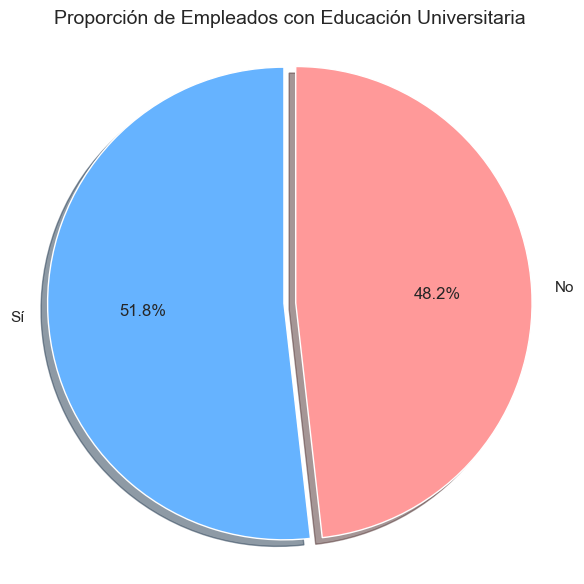

In [21]:
## Vamos a hacer un gráfico de pastel
# Colores personalizados
colores = ['#66b3ff', '#ff9999']

# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(
    porcentaje_educacion,
    labels=porcentaje_educacion.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores,
    explode=(0.05, 0),  # Resalta la primera sección
    shadow=True
)

plt.title('Proporción de Empleados con Educación Universitaria', fontsize=14)
plt.axis('equal')  # Mantiene el círculo perfecto
plt.tight_layout()
plt.show()

## 1️⃣3️⃣ Pregunta  
**¿Cuál es la compensación total promedio por país y nivel de senioridad?**  
*(Presenta la respuesta en una tabla pivote).*

### ¿Por qué importa?  
- Permite comparar si la diferencia salarial entre Juniors y Seniors es coherente en todos los países.  
- Identifica países donde los Seniors se pagan por encima o por debajo de la media global.  
- Ayuda a diseñar políticas de compensación regionales y ajustar los planes de carrera.

### Pista  
Crea una tabla pivote con `index='pais'`, `columns='senioridad'` y `values='compensacion_total'`, usando `aggfunc='mean'`.

In [22]:
# Tabla pivote: compensación promedio por país y senioridad
# Crear tabla pivote
pivot_table = df_salarios_pais.pivot_table(
    index='pais',
    columns='senioridad',
    values='compensacion_total',
    aggfunc='mean'
).round(2)

# Mostrar la tabla
print("💼 Compensación total promedio por país y senioridad:")
display(pivot_table)



💼 Compensación total promedio por país y senioridad:


senioridad,Junior,Senior
pais,,
Argentina,89211.75,96921.35
Chile,97065.14,98729.21
Colombia,96912.62,100323.40
Costa Rica,103058.79,86087.17
México,86462.66,94921.74
Panamá,90936.82,94432.91
Perú,92564.37,93887.39
Uruguay,91380.05,99751.69


#### Explicación del Código

- index='pais': Filas serán los países.

- columns='senioridad': Columnas serán los niveles de senioridad (Junior, Senior).

- values='compensacion_total': El dato que se analiza.

- aggfunc='mean': Calcula el promedio por grupo.

- .round(2): Redondea a dos decimales para mayor claridad.

#### Conclusión del cálculo:

Se observa una excepción en Costa Rica, donde los empleados Junior presentan una compensación promedio mayor que los Seniors, lo que podría estar influenciado por outliers, tamaños de muestra dispares o políticas internas no convencionales. Requerira exploración adicional

## 1️⃣4️⃣ Pregunta  
**¿Qué relación existe entre el salario anual y el bono anual?**  
*(Visualízalo en un scatterplot).*

### ¿Por qué importa?  
- Permite ver si los bonos son proporcionales al salario base o se otorgan de forma independiente.  
- Ayuda a detectar empleados con bonos atípicamente altos respecto a su sueldo.  
- Informa sobre la política de incentivos y su coherencia interna.

### Pista  
Usa `sns.scatterplot()` con `x='sueldo_anual_dolares'` y `y='bono_anual_dolares'`.

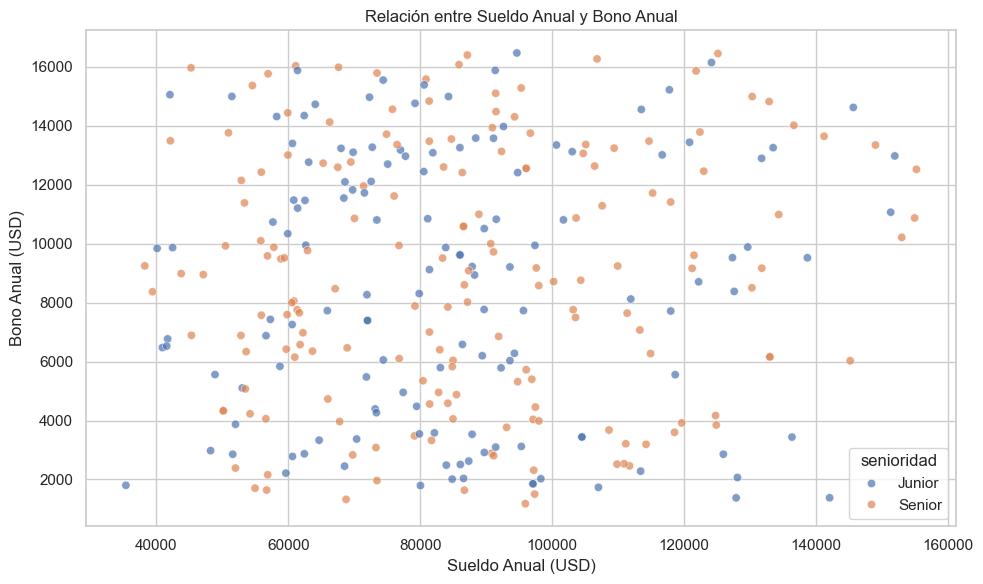

In [23]:
# Dispersión salario anual vs bono anual
# Crear el scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_salarios_pais,
    x='sueldo_usd', 
    y='bono_anual_dolares',
    hue='senioridad',  # opcional: colorear por nivel
    alpha=0.7
)
plt.title('Relación entre Sueldo Anual y Bono Anual')
plt.xlabel('Sueldo Anual (USD)')
plt.ylabel('Bono Anual (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

*Análisis del Scatterplot: Relación Sueldo Anual vs Bono Anual*

🔹Relación general (correlación):

A simple vista no hay una correlación lineal fuerte entre el sueldo anual y el bono anual.

Hay personas con sueldos bajos que reciben bonos altos y viceversa.

Esto sugiere que los bonos no dependen directamente del sueldo base, sino de otros factores (como desempeño, tipo de empresa, país o políticas internas).

🔹Dispersión de los puntos:

La nube de puntos está muy dispersa y no forma una línea clara, lo cual refuerza la baja correlación.

Sin embargo, hay una concentración de empleados con sueldo entre $50,000 y $90,000 y bonos entre $6,000 y $12,000.

🔹Comparación Junior vs Senior:

Ambos grupos están distribuidos a lo largo del gráfico, pero:

Algunos Seniors alcanzan sueldos más altos (más de $120,000).

No se observa una diferencia significativa en el rango de bonos entre Juniors y Seniors.

Esto puede ser un indicio de que los bonos no escalan proporcionalmente con la senioridad o que los Juniors tienen incentivos similares por políticas internas.

🔹Outliers:

Algunos puntos se destacan por tener bonos extremadamente altos o sueldos desproporcionados. Sería interesante investigarlos como posibles:

- Outliers reales (casos excepcionales).

- Errores de carga o registro.

*Detalles clave del Código:*

🔹sns.scatterplot(...): construye un gráfico de dispersión usando Seaborn.

🔹x='sueldo_usd', y='bono_anual_dolares': son las dos variables que queremos comparar.

🔹hue='senioridad': colorea los puntos según si son Junior o Senior.

🔹alpha=0.7: controla la transparencia, útil cuando los puntos se superponen.

🔹figsize=(10,6): define el tamaño del gráfico.

🔹plt.grid(True): agrega una cuadrícula para facilitar lectura.

🔹plt.tight_layout(): ajusta márgenes automáticamente.

## 1️⃣5️⃣ Pregunta  
**¿Qué porcentaje de empleados lleva más de 5 años en la empresa?**

### ¿Por qué importa?  
- Mide la **retención de talento** y la estabilidad de la plantilla.  
- Un porcentaje alto indica lealtad y experiencia acumulada; uno bajo puede señalar rotación elevada.  
- Informa iniciativas de engagement y programas de reconocimiento para empleados veteranos.

### Pista  
Aplica una condición `df['anos_en_la_empresa'] > 5`, usa `.mean()` para obtener la proporción y multiplícalo por 100.

In [24]:
# Porcentaje de empleados con más de 5 años en la empresa
# Calculamos el porcentaje de empleados con más de 5 años en la empresa
porcentaje_mas_5_anos = (df_salarios_pais['años_en_la_empresa'] > 5).mean() * 100

# Mostramos el resultado redondeado a 2 decimales
print(f"📊 Porcentaje de empleados con más de 5 años en la empresa: {porcentaje_mas_5_anos:.2f}%")


📊 Porcentaje de empleados con más de 5 años en la empresa: 55.70%


- ¿Qué significa esto?

Más de la mitad de los empleados han estado en la empresa por más de 5 años, lo cual es un indicador positivo de retención.

Puede reflejar estabilidad laboral, un ambiente de trabajo atractivo o beneficios que fomentan la permanencia.

También sugiere una base de empleados con experiencia, lo cual es valioso para procesos internos, liderazgo y cultura organizacional.

#### Explicación del código

🔹df_salarios_pais['años_en_la_empresa'] > 5 crea una serie booleana (True si el empleado tiene más de 5 años).

🔹.mean() en una serie booleana devuelve la proporción de True (ya que True = 1 y False = 0).

🔹Multiplicamos por 100 para convertirlo a porcentaje.

🔹El resultado final es el porcentaje de empleados “veteranos” en la empresa.

## 1️⃣6️⃣ Pregunta  
**¿Qué país presenta el bono anual promedio más alto?**

### ¿Por qué importa?  
- Indica dónde la empresa invierte más en incentivos variables.  
- Ayuda a evaluar la competitividad de los planes de bonificación por región.  
- Puede revelar disparidades que requieran revisión de políticas de compensación.

### Pista  
Agrupa por `pais`, calcula la media de `bono_anual_dolares` y ordena de mayor a menor.

In [25]:
# País con el bono anual promedio más alto
# Agrupar por país y calcular el bono anual promedio
bono_promedio_por_pais = df_salarios_pais.groupby('pais')['bono_anual_dolares'].mean().sort_values(ascending=False)

# Mostrar el resultado
print(bono_promedio_por_pais)


pais
México        9359.848837
Uruguay       9281.568421
Perú          8967.555882
Colombia      8851.418605
Costa Rica    8811.282051
Argentina     8466.512195
Chile         8285.616216
Panamá        7833.271875
Name: bono_anual_dolares, dtype: float64


#### Explicación del Código

- df_salarios_pais.groupby('pais'):
Agrupa el DataFrame por la columna "pais" para que podamos aplicar operaciones estadísticas por país.

- ['bono_anual_dolares'].mean():
Calcula el promedio del bono anual en dólares para cada grupo (es decir, para cada país).

- .sort_values(ascending=False):
Ordena los países de mayor a menor según el promedio de bono anual. Esto permite identificar rápidamente el país con el bono más alto.

- print():
Muestra los resultados en pantalla.

## 1️⃣7️⃣ Pregunta  
**¿Cómo varía la distribución de la compensación total entre países?**  
*(Muestra un boxplot por país para comparar rangos y outliers).*

### ¿Por qué importa?  
- Visualiza diferencias salariales entre mercados.  
- Ayuda a identificar países con mayor dispersión o presencia de outliers altos/bajos.  
- Facilita decisiones sobre ajustes regionales y equidad interna.

### Pista  
Emplea `sns.boxplot()` con `x='pais'` y `y='compensacion_total'`; rota las etiquetas para que no se solapen.

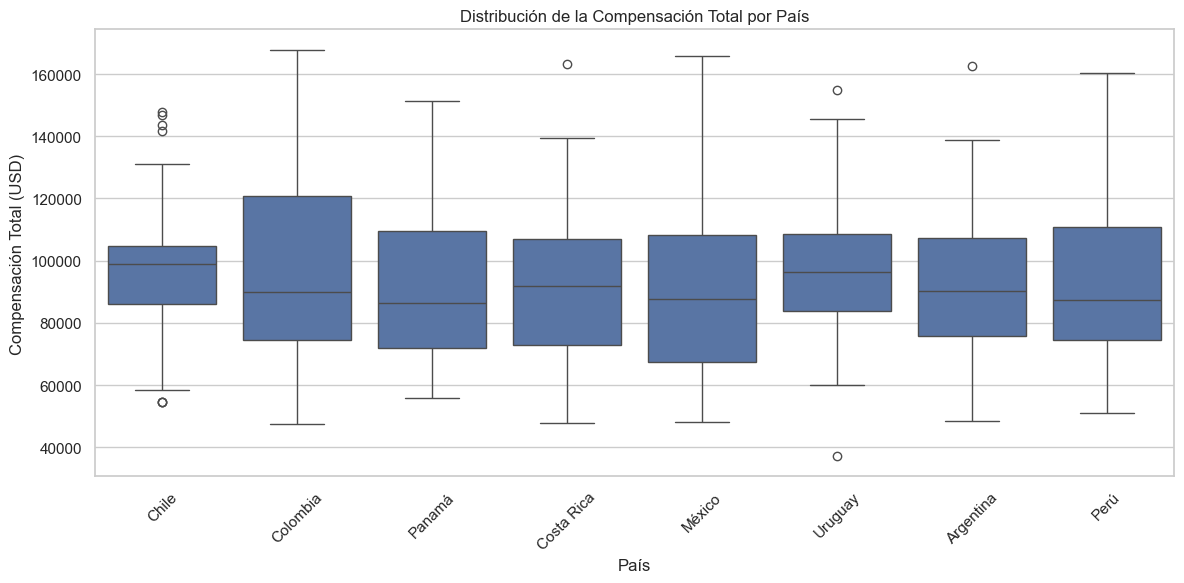

In [26]:
# Boxplot de compensación total por país
# Definimos el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Creamos el boxplot
sns.boxplot(data=df_salarios_pais, x='pais', y='compensacion_total')

# Rotamos etiquetas para que no se solapen
plt.xticks(rotation=45)

# Título y etiquetas
plt.title('Distribución de la Compensación Total por País')
plt.xlabel('País')
plt.ylabel('Compensación Total (USD)')

# Mostrar gráfico
plt.tight_layout()
plt.show()

- #### Resumen del Análisis del Boxplot de Compensación Total por País:

Chile, Uruguay y Costa Rica muestran las compensaciones medianas más altas, reflejando mejores condiciones salariales promedio.

Colombia tiene la mayor dispersión salarial, lo que podría indicar desigualdad o diversidad de cargos.

Todos los países presentan outliers altos, asociados a salarios excepcionales, y algunos como Uruguay o Argentina también tienen outliers bajos, posiblemente por registros atípicos.

En general, la mayoría de los países tienen compensaciones entre 85,000 y 100,000 USD, lo que sugiere cierta homogeneidad regional con algunas excepciones.

#### Explicación del código

- plt.figure(figsize=(12, 6)): configura el tamaño del gráfico para que las etiquetas quepan cómodamente.

- sns.boxplot(...): crea un boxplot donde:

- x='pais': el eje horizontal muestra cada país.

- y='compensacion_total': el eje vertical muestra los valores de compensación total.

- plt.xticks(rotation=45): rota las etiquetas de los países para que no se encimen.

- plt.title, plt.xlabel, plt.ylabel: añaden título y etiquetas descriptivas.

- plt.tight_layout(): ajusta automáticamente los márgenes para que todo se vea bien.

## 1️⃣8️⃣ Pregunta  
**¿Cuál es el promedio de años en la empresa para cada cargo?**

### ¿Por qué importa?  
- Indica qué roles retienen talento por más tiempo.  
- Ayuda a identificar posiciones con alta rotación que podrían requerir planes de carrera o incentivos adicionales.  
- Ofrece información para comparar madurez y profundidad de experiencia entre áreas.

### Pista  
Agrupa por `cargo`, aplica `mean()` sobre `anos_en_la_empresa` y ordena descendente para ver los cargos con mayor antigüedad media.

In [27]:
# Promedio de años en la empresa por cargo
# Agrupamos por cargo y calculamos la media de años en la empresa
promedio_antiguedad_por_cargo = df_salarios_pais.groupby("cargo")["años_en_la_empresa"].mean().sort_values(ascending=False)

# Mostramos el resultado
print(promedio_antiguedad_por_cargo)


cargo
Product Owner                7.789474
Data Scientist               7.000000
Python Developer             6.666667
Data Analyst                 6.621622
AI Software Engineer         6.517241
Data Engineer                6.500000
Machine Learning Engineer    6.500000
Software Engineer            5.181818
Project Manager              5.156250
Name: años_en_la_empresa, dtype: float64


#### Análisis del Promedio de Años en la Empresa por Cargo
- Product Owner es el rol con mayor antigüedad promedio (7.79 años), lo cual podría indicar estabilidad en roles estratégicos de gestión de producto.

- Le sigue Data Scientist con 7 años en promedio, lo que sugiere una buena retención en este perfil técnico y especializado.

- Python Developers, Data Analysts, y AI Software Engineers también muestran promedios superiores a los 6.5 años, reflejando que los perfiles de datos en general tienden a mantenerse en la empresa.

- En contraste, cargos como Project Manager y Software Engineer muestran una permanencia promedio ligeramente más baja (alrededor de 5 años), lo cual podría indicar mayor rotación o cambios frecuentes en esos puestos.

#### Explicación del código

- df_salarios_pais.groupby("cargo"): Agrupa los datos por el nombre del cargo.

- ["años_en_la_empresa"].mean(): Calcula la media de años en la empresa para cada cargo.

- .sort_values(ascending=False): Ordena los cargos desde el de mayor antigüedad promedio al menor.


## 1️⃣9️⃣ Pregunta  
**¿Cuál es la mediana del ingreso per cápita entre los países presentes en el dataset?**

### ¿Por qué importa?  
- Brinda un punto de referencia de **poder adquisitivo** promedio para las regiones donde opera la empresa.  
- Facilita comparar la compensación interna con los niveles de ingreso del país, aportando contexto sobre competitividad salarial local.  
- La mediana es robusta frente a valores extremos y refleja mejor el ingreso “típico” que el promedio en economías dispares.

### Pista  
Basta con aplicar `.median()` a la columna `ingreso_per_capita`.

In [28]:
# Mediana del ingreso per cápita de los países
mediana_ingreso = df_salarios_pais['ingreso_per_capita'].median()
print(f"💰 Mediana del ingreso per cápita: ${mediana_ingreso:,.2f}")


💰 Mediana del ingreso per cápita: $14,120.00


#### ¿Cómo interpretar esto?

Este valor representa el ingreso “típico” o central entre los países donde operan los empleados.

Al ser la mediana, no se ve distorsionada por países con ingresos extremadamente altos o bajos.

#### Explicación del Código

- df_salarios_pais['ingreso_per_capita']: selecciona la columna con los datos de ingreso per cápita por país.

- .median(): calcula la mediana (el valor central de la distribución ordenada).

- :,.2f: da formato al número con comas como separadores de miles y 2 decimales, para que sea más legible.

## 2️⃣0️⃣ Pregunta  
**¿Cómo se distribuyen los bonos anuales (USD) según el nivel de senioridad?**  
*(Representa la comparación con un violinplot).*

### ¿Por qué importa?  
- Muestra no solo la mediana y el rango, sino la **densidad completa** de los bonos para Juniors y Seniors.  
- Facilita detectar si los rangos de bonos se solapan o si los Seniors reciben incentivos notablemente mayores.  
- Ayuda a evaluar la equidad y efectividad del esquema de bonificación por experiencia.

### Pista  
Usa `sns.violinplot()` con `x='senioridad'` y `y='bono_anual_dolares'`.

C:\Users\genti\AppData\Local\Temp\ipykernel_61436\489970675.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_salarios_pais, x='senioridad', y='bono_anual_dolares', palette='pastel')


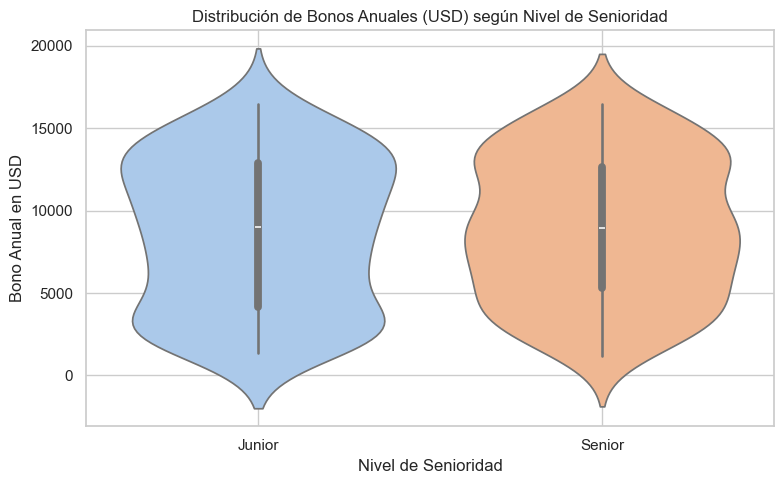

In [29]:
# Violinplot de bonos anuales por senioridad
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_salarios_pais, x='senioridad', y='bono_anual_dolares', palette='pastel')
plt.title('Distribución de Bonos Anuales (USD) según Nivel de Senioridad')
plt.xlabel('Nivel de Senioridad')
plt.ylabel('Bono Anual en USD')
plt.grid(True)
plt.tight_layout()
plt.show()

##### Análisis del Violinplot: Bonos Anuales por Senioridad

* - *Observaciones clave:* 

- Distribución similar para Junior y Senior:

Ambas curvas tienen una forma parecida, con la mayor densidad de bonos anuales concentrada entre 8,000 y 14,000 USD.

La mediana (línea blanca central) está ligeramente más alta en los Senior, pero no hay una diferencia extrema.

- Presencia de valores extremos bajos:

Se observan algunos empleados Junior y Senior con bonos muy bajos (cercanos a 0), posiblemente por política o recién contratados.

- Bono máximo similar:

El tope de bonos está alrededor de los 16,000 USD en ambos niveles.

* - ##### Conclusión:

Aunque los Senior tienden a recibir bonos más altos en promedio, la diferencia no es dramática, lo que puede indicar una política relativamente uniforme o incluso áreas de mejora en diferenciación por experiencia.

Explicación del Código

- sns.violinplot(...): Dibuja un gráfico de densidad para comparar la distribución entre categorías.

- x='senioridad': Eje categórico (Junior vs. Senior).

- y='bono_anual_dolares': Valores cuantitativos a comparar.

- palette='pastel': Mejora visual para distinguir los grupos.

- tight_layout() y grid(True): Ajusta y mejora la legibilidad.

## 🎉 ¡Felicidades!

Has completado el proyecto integral de **Análisis de Datos con Python**.  
Pasaste por todo el ciclo:

1. **Preparar el entorno**  
2. **Limpiar y transformar datos**  
3. **Explorar con visualizaciones**  
4. **Responder preguntas de negocio reales**

Cada notebook, gráfico y métrica que generaste demuestra tu capacidad para convertir datos en información valiosa. ¡Sigue practicando, comparte tus hallazgos con la comunidad PyData Panamá y recuerda que el siguiente insight puede cambiar una decisión clave!

🚀 **Buen trabajo, Data Analyst**. 

In [ ]:
# Porcentaje de empleados con más de 5 años en la empresa
# Calculamos el porcentaje de empleados con más de 5 años en la empresa
porcentaje_mas_5_anos = (df_salarios_pais['años_en_la_empresa'] > 5).mean() * 100

# Mostramos el resultado redondeado a 2 decimales
print(f"📊 Porcentaje de empleados con más de 5 años en la empresa: {porcentaje_mas_5_anos:.2f}%")


📊 Porcentaje de empleados con más de 5 años en la empresa: 55.70%
